In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [10]:
DATA_FOLDER = 'LAM data'
FIG_FOLDER = 'fig'

os.makedirs(FIG_FOLDER, exist_ok=True)

In [11]:
data_file_north = os.path.join(DATA_FOLDER, '5_min_aggregates_oct_30.xlsx')
data_file_south = os.path.join(DATA_FOLDER, '5_min_aggregates_oct_30.xlsx')
data_file_east = os.path.join(DATA_FOLDER, '5_min_aggregates_oct_30.xlsx')
data_file_west = os.path.join(DATA_FOLDER, '5_min_aggregates_oct_30.xlsx')

df_n = pd.read_excel(data_file_north, sheet_name='4')
df_s = pd.read_excel(data_file_north, sheet_name='107')
df_e = pd.read_excel(data_file_north, sheet_name='159')
df_w = pd.read_excel(data_file_north, sheet_name='128')

In [12]:
df_n

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Helsinki,Both.1,Hämeenlinna.1,Helsinki.1,Both.2,Hämeenlinna.2,Helsinki.2,Both.3,Hämeenlinna.3,Helsinki.3
0,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,...,Volume [veh/5 min] direction Helsinki,Volume [veh/h] both directions,Volume [veh/h] direction Hämeenlinna,Volume [veh/h] direction Helsinki,Average speed [km/h] both directions,Average speed [km/h] direction Hämeenlinna,Average speed [km/h] direction Helsinki,Density [veh/km] both directions,Density [veh/km] direction Hämeenlinna,Density [veh/km] direction Helsinki
1,4,18,303,0,0,8,76,1980-03-01 00:00:00,1,Hämeenlinna,...,7,312,228,84,88.653846,90.263158,84.285714,3.519306,2.525948,0.99661
2,4,18,303,0,0,15,39,1980-03-01 00:00:00,1,Hämeenlinna,...,12,324,180,144,86.444444,87.266667,85.416667,3.748072,2.062643,1.685854
3,4,18,303,0,0,38,99,1960-03-01 00:00:00,2,Hämeenlinna,...,9,348,240,108,88.62069,90,85.555556,3.926848,2.666667,1.262338
4,4,18,303,0,0,53,11,1960-03-01 00:00:00,2,Hämeenlinna,...,7,276,192,84,89.608696,87.25,95,3.080058,2.200573,0.884211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_n.loc[326, 'Unnamed: 3']

nan

Between 6:00 - 9:00

In [22]:
def f(x): 
    return datetime.time(x['hour'], x['minute'], x['second'])
df_n['time_event'] = df_n.apply(f, axis=1)

KeyError: 'hour'

In [23]:
df_n_good_t = df_n[(datetime.time(hour=6) <= df_n.time_event) & (df_n.time_event < datetime.time(hour=9))]

AttributeError: 'DataFrame' object has no attribute 'time_event'

In [24]:
df_n_good_t['direction'].value_counts()

NameError: name 'df_n_good_t' is not defined

In [25]:
df_n_good_t['direction'].means()

NameError: name 'df_n_good_t' is not defined

In [16]:
df_s

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
0,107,18,276,0,0,11,15,1940-03-01 00:00:00,1,Hämeenlinna,1,83,0,1115,-2,0
1,107,18,276,0,0,20,55,1960-03-01 00:00:00,4,Helsinki,1,76,0,2055,-2,0
2,107,18,276,0,1,36,4,1940-03-01 00:00:00,1,Hämeenlinna,1,81,0,9604,8474,0
3,107,18,276,0,2,8,14,1940-04-01 00:00:00,1,Hämeenlinna,1,93,0,12814,3194,0
4,107,18,276,0,2,18,33,6.00,3,Helsinki,1,79,0,13833,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,107,18,276,23,58,58,0,1980-03-01 00:00:00,4,Helsinki,1,85,0,8633800,4283,0
60271,107,18,276,23,59,5,83,16.00,4,Helsinki,4,58,0,8634583,766,0
60272,107,18,276,23,59,12,48,1980-03-01 00:00:00,4,Helsinki,1,84,0,8635248,565,0
60273,107,18,276,23,59,31,63,4.00,1,Hämeenlinna,1,86,0,8637163,9076,0


Between 6:00 - 9:00

In [58]:
def f(x): 
    return datetime.time(x['hour'], x['minute'], x['second'])
df_s['time_event'] = df_s.apply(f, axis=1)

In [59]:
df_s_good_t = df_s[(datetime.time(hour=6) <= df_s.time_event) & (df_s.time_event < datetime.time(hour=9))]

In [60]:
df_s_good_t['direction'].value_counts()

Helsinki       8038
Hämeenlinna    4915
Name: direction, dtype: int64

at 23004, $\vec{Helsinki}$ - at 23107, $\vec{Helsinki}$

In [1]:
9863 -  8038

1825

So 1825 needed to be ramp-out between 004 and 107 (direction to Helsinki)?

In [17]:
df_e

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
0,159,18,276,0,0,10,99,1980-05-01 00:00:00,2,Vantaa,1,85,0,1099,-2,0
1,159,18,276,0,0,10,10,4.00,1,Vantaa,1,82,0,1010,-2,0
2,159,18,276,0,0,13,23,1940-03-01 00:00:00,2,Vantaa,1,79,0,1323,199,0
3,159,18,276,0,0,43,99,3.00,4,Espoo,1,79,0,4399,-2,0
4,159,18,276,0,0,49,15,3.00,4,Espoo,1,70,0,4915,502,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65961,159,18,276,23,59,22,81,25.00,1,Vantaa,5,78,0,8636281,1642,0
65962,159,18,276,23,59,24,99,4.00,4,Espoo,1,57,0,8636499,618,0
65963,159,18,276,23,59,46,25,1.00,1,Vantaa,1,1,1,8638625,2228,0
65964,159,18,276,23,59,50,99,1940-03-01 00:00:00,4,Espoo,1,66,0,8639099,2574,0


Between 6:00 - 9:00

In [61]:
def f(x): 
    return datetime.time(x['hour'], x['minute'], x['second'])
df_e['time_event'] = df_e.apply(f, axis=1)

In [62]:
df_e_good_t = df_e[(datetime.time(hour=6) <= df_e.time_event) & (df_e.time_event < datetime.time(hour=9))]

In [63]:
df_e_good_t['direction'].value_counts()

Vantaa    9069
Espoo     7336
Name: direction, dtype: int64

In [18]:
df_w

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
0,128,18,276,0,0,18,99,2020-04-01 00:00:00,5,Espoo,1,83,0,1899,-2,0
1,128,18,276,0,0,20,99,1940-03-01 00:00:00,5,Espoo,1,83,0,2099,181,0
2,128,18,276,0,0,24,53,17.20,5,Espoo,5,81,0,2453,339,0
3,128,18,276,0,0,28,99,6.00,2,Vantaa,1,79,0,2899,-2,0
4,128,18,276,0,0,35,48,24.20,2,Vantaa,5,83,0,3548,621,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91799,128,18,276,23,59,15,17,2020-03-01 00:00:00,2,Vantaa,1,81,0,8635517,300,0
91800,128,18,276,23,59,17,99,1940-03-01 00:00:00,5,Espoo,1,96,0,8635799,3484,0
91801,128,18,276,23,59,24,69,2020-11-01 00:00:00,1,Vantaa,2,79,0,8636469,14555,0
91802,128,18,276,23,59,54,99,16.60,2,Vantaa,4,74,0,8639499,3967,0


Between 6:00 - 9:00

In [40]:
def f(x): 
    return datetime.time(x['hour'], x['minute'], x['second'])
df_w['time_event'] = df_w.apply(f, axis=1)

In [48]:
df_w_good_t = df_w[(datetime.time(hour=6) <= df_w.time_event) & (df_w.time_event < datetime.time(hour=9))]

In [54]:
df_w_good_t['direction'].value_counts()

Vantaa    10350
Espoo      9113
Name: direction, dtype: int64

In [65]:
Direction_Vantaa_dvg_NS = 10350 - 9069
print(Direction_Vantaa_dvgNS) # we do not know the volume of traffic went north or south

1281


In [66]:
Direction_Espoo_dvg_NS = 9113 - 7336
print(Direction_Espoo_dvg_NS)

1777


In [67]:
Direction_Hämeenlinna_dgv_EW = 4915 - 4644
print(Direction_Hämeenlinna_dgv_EW)

271


In [68]:
Direction_Helsinki_dvg_EW = 9863 - 8038
print(Direction_Helsinki_dvg_EW)

1825


Text(0.5, 1.0, '145 - Tapiola / Itäkeskus')

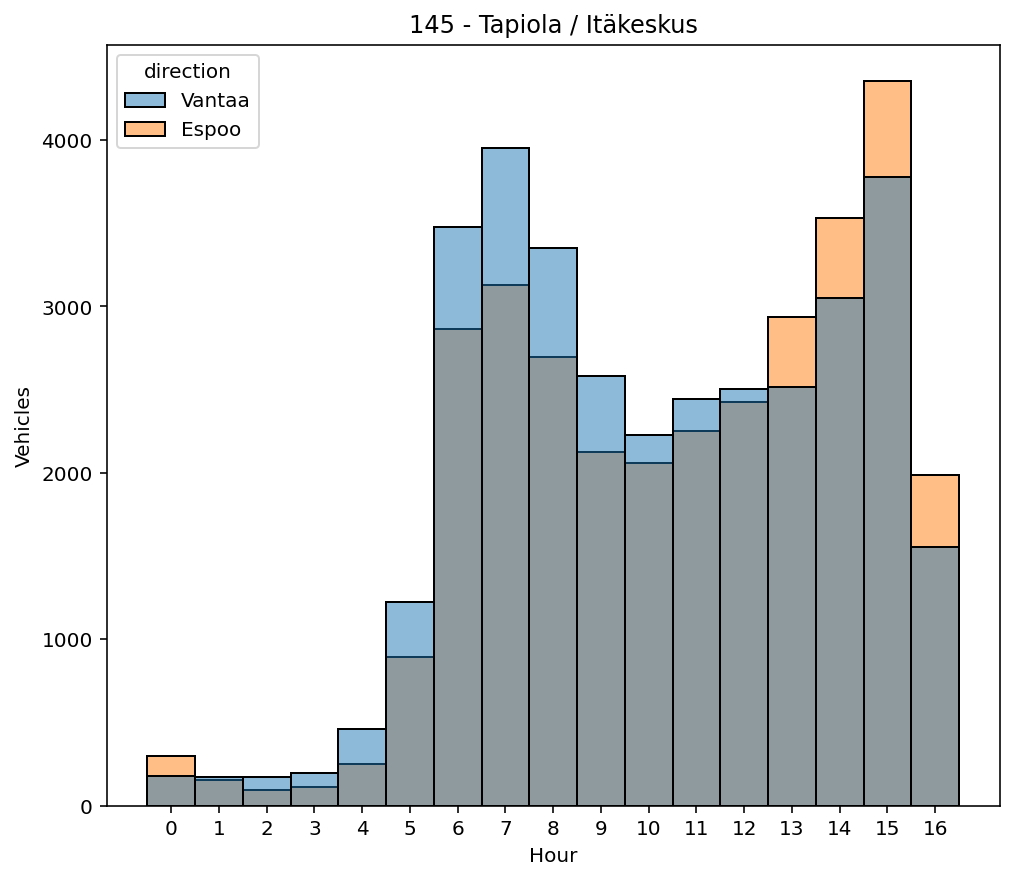

In [29]:
fig, ax = plt.subplots(figsize=(8, 7))
df_e['hour_str'] = df.hour.astype(str)
sns.histplot(df_e, x='hour_str', hue='direction', ax=ax) # kde=True
ax.set_xlabel('Hour')
ax.set_ylabel('Vehicles')
ax.set_title("145 - Tapiola / Itäkeskus")

In [7]:
n_m = 8038 # cars
T = 3 # hours
L = 4 # meters

q = n_m / T
k = n_m / L
v = q / k
print('Average speed', v,'(km/h)')

Average speed 1.3333333333333335 (km/h)
